In [1]:
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
#from collection import defaultdict
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
#from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
import pydotplus
#import torch
#import tslearn
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from IPython.display import Image
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
dl =pd.read_csv("C:\\Users\\Simone\\Desktop\\crash_prediction_dataset\\london_train_0.csv", sep=',')
s = "C:\\Users\\Simone\\Desktop\\crash_prediction_dataset\\"
dl1 =pd.read_csv(s + "london_train_1.csv", sep=',')
dl2 =pd.read_csv(s + "london_train_2.csv", sep=',')
dl3 =pd.read_csv(s + "london_train_3.csv", sep=',')
dl4 =pd.read_csv(s + "london_train_4.csv", sep=',')
dl5 =pd.read_csv(s + "london_train_5.csv", sep=',')
dl6 =pd.read_csv(s + "london_train_6.csv", sep=',')
dr = pd.read_csv(s + "rome_train_0.csv", sep=',')
dr1 = pd.read_csv(s + "rome_train_1.csv", sep=',')
dr2 = pd.read_csv(s + "rome_train_2.csv", sep=',')
dr3 = pd.read_csv(s + "rome_train_3.csv", sep=',')
dr4 = pd.read_csv(s + "rome_train_4.csv", sep=',')
dr5 = pd.read_csv(s + "rome_train_5.csv", sep=',')
dr6 = pd.read_csv(s + "rome_train_6.csv", sep=',')
dt = pd.read_csv(s + "tuscany_train_0.csv", sep=',')
dt1 = pd.read_csv(s + "tuscany_train_1.csv", sep=',')
dt2 = pd.read_csv(s + "tuscany_train_2.csv", sep=',')
dt3 = pd.read_csv(s + "tuscany_train_3.csv", sep=',')
dt4 = pd.read_csv(s + "tuscany_train_4.csv", sep=',')
dt5 = pd.read_csv(s + "tuscany_train_5.csv", sep=',')
dt6 = pd.read_csv(s + "tuscany_train_6.csv", sep=',')

In [3]:
def solving(df):
    '''dropp = [
    'occ_avg_speed_B' ,'occ_avg_speed_C' ,'occ_avg_speed_Q' ,'occ_avg_traj_speed','occ_nbr_crash' ,'occ_nbr_evnt_A' ,
    'occ_nbr_evnt_B' ,'occ_nbr_evnt_C' ,'occ_nbr_evnt_Q' ,'occ_nbr_evnt_start','occ_nbr_evnt_stop' ,'occ_nbr_traj_move' ,
    'occ_nbr_traj_start' ,'occ_nbr_traj_stop' ,'ptot_events_type_B_loc0' ,
    'ptot_events_type_C_loc0' ,'ptot_events_type_C_loc2'  ,'radius_of_gyration' ,
    'occ_avg_avg_acc_A' , 'uid','jaccard','cosine','cosine_mov','ptot_events_type_Q_loc0','jaccard_mov'
    'occ_avg_avg_acc_B' ,'occ_avg_avg_acc_C' ,'occ_avg_avg_acc_Q' ,'occ_avg_max_acc_A' ,
    'occ_avg_max_acc_B' ,'occ_avg_max_acc_C' ,'occ_avg_max_acc_Q' ,'occ_avg_speed_A' ,
    'reg_avg_avg_acc_A' ,'reg_avg_avg_acc_B' ,'reg_avg_avg_acc_C' ,'reg_avg_avg_acc_Q' ,'reg_avg_max_acc_A' ,'reg_avg_max_acc_B' ,
    'reg_avg_max_acc_C' ,'reg_avg_max_acc_Q' ,'reg_avg_speed_A' ,'reg_avg_speed_B' ,'reg_avg_speed_C' ,'reg_avg_speed_Q' ,
    'reg_avg_traj_speed' ,'reg_nbr_crash' ,'reg_nbr_evnt_A' ,'reg_nbr_evnt_B' ,'reg_nbr_evnt_C' ,'reg_nbr_evnt_Q' ,
    'reg_nbr_evnt_start', 'reg_nbr_evnt_stop' ,'reg_nbr_traj_move' ,'reg_nbr_traj_start' ,'reg_nbr_traj_stop' ,"ptot_events_type_B_loc2"
     ]
    colsToDrop = ['uid','triangles', 'tot_events_type_A_loc0',
                  'ptot_events_typestart_loc0','ptot_events_typestart_loc1','ptot_events_typestart_loc2','ptot_events_typestop_loc0',
'ptot_events_typestop_loc1','ptot_events_typestop_loc2','tot_events_type_A_loc1', 'tot_events_type_A_loc2', 
'tot_events_type_B_loc0', 'tot_events_type_B_loc1', 'tot_events_type_B_loc2', 'tot_events_type_C_loc0', 
'tot_events_type_C_loc1', 'tot_events_type_C_loc2', 'tot_events_type_Q_loc0', 
'tot_events_type_Q_loc1', 'tot_events_type_Q_loc2', 
'tot_events_type_start_loc0','tot_events_type_start_loc1','tot_events_type_start_loc2', 
'tot_events_type_stop_loc0', 'tot_events_type_stop_loc1','tot_events_type_stop_loc2','tot_events_loc0',
'tot_events_loc1' ,'tot_events_loc2' ,'tot_events_pA' ,'tot_events_pB' ,'tot_events_pC' ,'tot_events_pQ' ,'tot_events_ploc0', 
'tot_events_ploc1' ,'tot_events_ploc2' ,'tot_events_pstart' ,'tot_events_pstop' ,'occ_avg_avg_acc_A' ,
'occ_avg_avg_acc_B' ,'occ_avg_avg_acc_C' ,'occ_avg_avg_acc_Q' ,'occ_avg_max_acc_A' ,
'occ_avg_max_acc_B' ,'occ_avg_max_acc_C' ,'occ_avg_max_acc_Q' ,'occ_avg_speed_A' ,
'occ_avg_speed_B' ,'occ_avg_speed_C' ,'occ_avg_speed_Q' ,'occ_avg_traj_speed','occ_nbr_crash' ,'occ_nbr_evnt_A' ,
'occ_nbr_evnt_B' ,'occ_nbr_evnt_C' ,'occ_nbr_evnt_Q' ,'occ_nbr_evnt_start','occ_nbr_evnt_stop' ,'occ_nbr_traj_move' ,
'occ_nbr_traj_start' ,'occ_nbr_traj_stop' ,'ptot_events_type_B_loc0' ,
'ptot_events_type_C_loc0' ,'ptot_events_type_C_loc2'  ,'radius_of_gyration' ,
'reg_avg_avg_acc_A' ,'reg_avg_avg_acc_B' ,'reg_avg_avg_acc_C' ,'reg_avg_avg_acc_Q' ,'reg_avg_max_acc_A' ,'reg_avg_max_acc_B' ,
'reg_avg_max_acc_C' ,'reg_avg_max_acc_Q' ,'reg_avg_speed_A' ,'reg_avg_speed_B' ,'reg_avg_speed_C' ,'reg_avg_speed_Q' ,
'reg_avg_traj_speed' ,'reg_nbr_crash' ,'reg_nbr_evnt_A' ,'reg_nbr_evnt_B' ,'reg_nbr_evnt_C' ,'reg_nbr_evnt_Q' ,
'reg_nbr_evnt_start', 'reg_nbr_evnt_stop' ,'reg_nbr_traj_move' ,'reg_nbr_traj_start' ,'reg_nbr_traj_stop' ,'regular_radius_of_gyration' ,'rentropy' ,
'std_angle' ,'std_angle_A', 'std_angle_B' ,'std_angle_C' ,'std_angle_Q' ,'std_angle_loc0', 'std_angle_loc1' ,'std_angle_loc2' ,
'std_angle_start' ,'std_angle_stop' ,'std_avg_acc' ,'std_avg_acc_A', 'std_avg_acc_B' ,'std_avg_acc_C' ,
'std_avg_acc_Q' ,'std_avg_acc_loc0', 'std_avg_acc_loc1' ,'std_avg_acc_loc2' ,'std_avg_acc_start' ,'std_avg_acc_stop' ,'std_duration' ,'std_duration_A', 
'std_duration_B' ,'std_duration_C' ,'std_duration_Q' ,'std_duration_loc0' ,'std_duration_loc1' ,'std_duration_loc2' ,
'std_duration_start' ,'std_duration_stop' ,'std_events_per_day' ,'std_events_per_day_A', 'std_events_per_day_B' ,'std_events_per_day_C' ,
'std_events_per_day_Q' ,'std_events_per_day_loc0' ,'std_events_per_day_loc1' ,'std_events_per_day_loc2' ,'std_events_per_day_start' ,
'std_events_per_day_stop' ,'std_events_per_time' ,'std_events_per_time_A', 'std_events_per_time_B' ,
'std_events_per_time_C' ,'std_events_per_time_Q' ,'std_events_per_time_loc0', 'std_events_per_time_loc1' ,
'std_events_per_time_loc2' ,'std_events_per_time_start' ,'std_events_per_time_stop' ,'std_km' ,'std_km_per_day' ,'std_max_acc' ,
'std_max_acc_A', 'std_max_acc_B' ,'std_max_acc_C' ,'std_max_acc_Q' ,'std_max_acc_loc0', 'std_max_acc_loc1' ,
'std_max_acc_loc2' ,'std_max_acc_start' ,'std_max_acc_stop' ,'std_max_speed_per_day', 'std_min_speed_per_day' ,'std_mov_duration' ,
'std_mov_length' ,'std_reg_mov_duration', 'std_speed' ,'std_traj_per_day', 'std_traveltime' ,'std_traveltime_per_day', 
'tot_duration' ,'tot_duration_A', 'tot_duration_B' ,'tot_duration_C' ,'tot_duration_Q' ,'tot_duration_loc0' ,
'tot_duration_loc1', 'tot_duration_loc2' ,'tot_duration_pA' ,'tot_duration_pB' ,'tot_duration_pC' ,'tot_duration_pQ' ,
'tot_duration_ploc0', 'tot_duration_ploc1' ,'tot_duration_ploc2' ,'tot_duration_pstart' ,'tot_duration_pstop' ,'tot_duration_start' ,
'tot_duration_stop' ,'mov_entropy_A' ,'mov_entropy_B' ,'mov_entropy_C' ,'mov_entropy_Q' ,'mov_entropy_start' ,
'mov_entropy_stop' ,'nbr_locations' ,'nbr_movements' ,'nbr_reg_locations', 'nbr_reg_movements' ,'l1_A' ,
'l1_B' ,'l1_C' ,'l1_Q' ,'l1_bcentrality', 'l1_count' ,'l1_dcentrality', 'l1_indegree' ,'l1_outdegree' ,'l1_start' ,'l1_stop' ,
'l1l2_A' ,'l1l2_B' ,'l1l2_C' ,'l1l2_Q' ,'l1l2_betweenness' ,'l1l2_count' ,'l1l2_start','l1l2_stop' ,'l1l3_A' ,'l1l3_B' ,'l1l3_C' ,
'l1l3_Q' ,'l1l3_betweenness' ,'l1l3_count' ,'l1l3_start' ,'l1l3_stop' ,'l2_A' ,'l2_B' ,'l2_C' ,'l2_Q' ,'l2_bcentrality' ,
'l2_count' ,'l2_dcentrality', 'l2_indegree' ,'l2_outdegree' ,'l2_start' ,'l2_stop' ,'l2l1_A' ,'l2l1_B' ,'l2l1_C' ,'l2l1_Q' ,
'l2l1_betweenness', 'l2l1_count' ,'l2l1_start' ,'l2l1_stop' ,'l2l3_A','l2l3_B','l2l3_C','l2l3_Q' ,'l2l3_betweenness', 
'l2l3_count','l2l3_start','l2l3_stop','l3_A' ,'l3_B' ,'l3_C' ,'l3_Q' ,'l3_bcentrality','l3_count' ,'l3_dcentrality',
'l3_indegree' ,'l3_outdegree','l3_start','l3_stop' ,'l3l1_A' ,'l3l1_B' ,'l3l1_C' ,'l3l1_Q' ,'l3l1_betweenness' ,'l3l1_count',
'l3l1_start' ,'l3l1_stop' ,'l3l2_A','l3l2_B' ,'l3l2_C' ,'l3l2_Q' ,'l3l2_betweenness', 'l3l2_count' ,'l3l2_start' ,'l3l2_stop' ,
'delta_locations','delta_movements' ,'delta_reg_locations','delta_rg','ptot_events_type_A_loc0', 'ptot_events_type_Q_loc0'
                 'jaccard','cosine','cosine_mov','ptot_events_type_Q_loc0','jaccard_mov'] 
for i in df:
        if i in dropp or i in colsToDrop:
            df=df.drop([i], axis=1)
        else:
            num = df[i].isna().sum()
            perc = (df[i].isna().sum())/len(df.index)*100
            if perc>1:
                df.drop(i, axis=1, inplace=True)
    for i in df:
        if df[i].isnull().sum()>0:
            med = df[i].mean()
            df[i].fillna(med, inplace = True)
    return df'''
    noremove = ['crash','tot_traj',  'avg_events_per_day_loc2', 'avg_angle_C', 'avg_min_speed_per_day', 'tot_events']

    for i in df:
        #if i in dropp or i in colsToDrop:
        if i not in noremove:
            df=df.drop([i], axis=1)
        else:
            num = df[i].isna().sum()
            perc = (df[i].isna().sum())/len(df.index)*100
            if perc>1:
                df.drop(i, axis=1, inplace=True)
    for i in df:
        if df[i].isnull().sum()>0:
            med = df[i].mean()
            df[i].fillna(med, inplace = True)
    return df

    

In [4]:
dl1=solving(dl1)
dl2=solving(dl2)
dl3=solving(dl3)
dl4=solving(dl4)
dl5=solving(dl5)
dl6=solving(dl6)
dr1=solving(dr1)
dr2=solving(dr2)
dr3=solving(dr3)
dr4=solving(dr4)
dr5=solving(dr5)
dr6=solving(dr6)
dt1=solving(dt1)
dt2=solving(dt2)
dt3=solving(dt3)
dt4=solving(dt4)
dt5=solving(dt5)
dt6=solving(dt6)

In [5]:
totRoma=(len(dr)+len(dr1)+len(dr2)+len(dr3)+len(dr4)+len(dr5)+len(dr6))
totToscana=(len(dt)+len(dt1)+len(dt2)+len(dt3)+len(dt4)+len(dt5)+len(dt6))
totLondra=(len(dl)+len(dl1)+len(dl2)+len(dl3)+len(dl4)+len(dl5)+len(dl6))
totCrashRoma=len(dr[dr["crash"]==1])+len(dr1[dr1["crash"]==1])+len(dr2[dr2["crash"]==1])+len(dr3[dr3["crash"]==1])+len(dr4[dr4["crash"]==1])+len(dr5[dr5["crash"]==1])+len(dr6[dr6["crash"]==1])
totCrashLondra=len(dl[dl["crash"]==1])+len(dl1[dl1["crash"]==1])+len(dl2[dl2["crash"]==1])+len(dl3[dl3["crash"]==1])+len(dl4[dl4["crash"]==1])+len(dl5[dl5["crash"]==1])+len(dl6[dl6["crash"]==1])
totCrashToscana=len(dt[dt["crash"]==1])+len(dt1[dt1["crash"]==1])+len(dt2[dt2["crash"]==1])+len(dt3[dt3["crash"]==1])+len(dt4[dt4["crash"]==1])+len(dt5[dt5["crash"]==1])+len(dt6[dt6["crash"]==1])
RomaNocrash=(totRoma-totCrashRoma)/7
ToscanaNocrash=(totToscana-totCrashToscana)/7
LondraNocrash=(totLondra-totCrashLondra)/7
print("la media degli elementi di Roma, Toscana e Londra é: {0:.2f}, {1:.2f} e {2:.2f} ".format(RomaNocrash,ToscanaNocrash, LondraNocrash))

la media degli elementi di Roma, Toscana e Londra é: 3706.14, 5834.14 e 5591.29 


#### Creation of a DF randomly chosen from the seven same place Datasets 

In [6]:
df_0 = dt[dt['crash'] == 0]
df_1 = dt1[dt1['crash'] == 0]
df_2 = dt2[dt2['crash'] == 0]
df_3 = dt3[dt3['crash'] == 0]
df_4 = dt4[dt4['crash'] == 0]
df_5 = dt5[dt5['crash'] == 0]
df_6 = dt6[dt6['crash'] == 0]
sizeTuscany=int(ToscanaNocrash/7)
T=df_0.sample(n = sizeTuscany)
T1=df_1.sample(n = sizeTuscany)
T2=df_2.sample(n = sizeTuscany)
T3=df_3.sample(n = sizeTuscany)
T4=df_4.sample(n = sizeTuscany)
T5=df_5.sample(n = sizeTuscany)
T6=df_6.sample(n = sizeTuscany)
frames=[T, T1, T2, T3, T4, T5, T6]
TuscanyNocrash=pd.concat(frames)

C:\Users\Simone\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [7]:
crash0=dt[dt["crash"]==1]
crash1=dt1[dt1["crash"]==1]
crash2=dt2[dt2["crash"]==1]
crash3=dt3[dt3["crash"]==1]
crash4=dt4[dt4["crash"]==1]
crash5=dt5[dt5["crash"]==1]
crash6=dt6[dt6["crash"]==1]
frames=[crash0,crash1,crash2,crash3,crash4,crash5,crash6]
TuscanyCrash= pd.concat(frames)

C:\Users\Simone\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [8]:
df_0 = dr[dr['crash'] == 0]
df_1 = dr1[dr1['crash'] == 0]
df_2 = dr2[dr2['crash'] == 0]
df_3 = dr3[dr3['crash'] == 0]
df_4 = dr4[dr4['crash'] == 0]
df_5 = dr5[dr5['crash'] == 0]
df_6 = dr6[dr6['crash'] == 0]
sizeRome=int(RomaNocrash/7)
R=df_0.sample(n = sizeRome)
R1=df_1.sample(n = sizeRome)
R2=df_2.sample(n = sizeRome)
R3=df_3.sample(n = sizeRome)
R4=df_4.sample(n = sizeRome)
R5=df_5.sample(n = sizeRome)
R6=df_6.sample(n = sizeRome)
frames=[R, R1, R2, R3, R4, R5, R6]
RomeNocrash=pd.concat(frames)

C:\Users\Simone\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [9]:
crash0=dr[dr["crash"]==1]
crash1=dr1[dr1["crash"]==1]
crash2=dr2[dr2["crash"]==1]
crash3=dr3[dr3["crash"]==1]
crash4=dr4[dr4["crash"]==1]
crash5=dr5[dr5["crash"]==1]
crash6=dr6[dr6["crash"]==1]
frames=[crash0,crash1,crash2,crash3,crash4,crash5,crash6]
RomeCrash= pd.concat(frames)

C:\Users\Simone\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [10]:
df_0 = dl[dl['crash'] == 0]
df_1 = dl1[dl1['crash'] == 0]
df_2 = dl2[dl2['crash'] == 0]
df_3 = dl3[dl3['crash'] == 0]
df_4 = dl4[dl4['crash'] == 0]
df_5 = dl5[dl5['crash'] == 0]
df_6 = dl6[dl6['crash'] == 0]
sizeLondra=int(LondraNocrash/7)
L=df_0.sample(n = sizeLondra)
L1=df_1.sample(n = sizeLondra)
L2=df_2.sample(n = sizeLondra)
L3=df_3.sample(n = sizeLondra)
L4=df_4.sample(n = sizeLondra)
L5=df_5.sample(n = sizeLondra)
L6=df_6.sample(n = sizeLondra)
frames=[L, L1, L2, L3, L4, L5, L6]
LondonNocrash=pd.concat(frames)

C:\Users\Simone\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [11]:
crash0=dl[dl["crash"]==1]
crash1=dl1[dl1["crash"]==1]
crash2=dl2[dl2["crash"]==1]
crash3=dl3[dl3["crash"]==1]
crash4=dl4[dl4["crash"]==1]
crash5=dl5[dl5["crash"]==1]
crash6=dl6[dl6["crash"]==1]
frames=[crash0,crash1,crash2,crash3,crash4,crash5,crash6]
LondonCrash= pd.concat(frames)

C:\Users\Simone\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


#### Final Dataset with all the crash and a randomly chosen part of no crashes

In [12]:
frames1=[TuscanyCrash,TuscanyNocrash]
frames2=[RomeCrash,RomeNocrash]
frames3=[LondonCrash,LondonNocrash]
DT=pd.concat(frames1) #TOSCANA
DR=pd.concat(frames2) #ROMA
DL=pd.concat(frames3) #LONDRA

In [13]:
DT=solving(DT)
DR=solving(DR)
DL=solving(DL)

In [14]:
def solvingMissing(df):
    for i in df:
        num = df[i].isna().sum()
        perc = (df[i].isna().sum())/len(df.index)*100
        if perc>1:
            df.drop(i, axis=1, inplace=True)
    for i in df:
        if df[i].isnull().sum()>0:
            med = df[i].mean()
            df[i].fillna(med, inplace = True)
    return df

<a id='class'></a>
## Classification 

In [15]:
#MODIFY DF0 ASSIGNING DL OR DR TO EXECUTE ALL THE TESTS WITH THE TRAINING OF LONDON AND ROME RESPECTIVELY
df0=solving(DL)
df1=solving(DR)
df2=solving(DT)


In [16]:
def valuate(y_pred,y_test):
    tp=0
    pred=0
    act=0
    rec=0
    trueneg = 0
    for i in range(len(y_pred)):
        if y_test[i]==1:
            act+=1
        if y_pred[i]==1:
            pred+=1
            if y_test[i]==1:
                tp+=1
            else:
                rec+=1
        if y_pred[i]==0:
            if y_test[i]==0:
                trueneg+=1
    if tp!=0 and rec!=0:
        print("Correct: ", tp, "--Actual Number of yes: ", act, "--Predicted yes: ",
              pred, "--Number of predicted yes but actual no: ", rec, "-- Number of correctly predicted NoCrash", trueneg , "-- Recall: ", tp/act, "--Precision:", tp/(tp+rec) )
    else:
        print("Correct: ", tp, "--Actual Number of yes: ", act, "--Predicted yes: ",
              pred, "--Number of predicted yes but actual no: ", rec)

In [17]:
import pydotplus
from sklearn import tree
from IPython.display import Image

# OVERALL DATASET OF 3 CITIES


To make the model usable on all territories, I train it on a unified dataset **DF**

In [18]:
frames=[df1,df2,df0] #,df0 is london, df1 is rome, df2 is toscana
DF = pd.concat(frames)


In [19]:
DF= solving(DF)
DF.isnull().sum().sum()

0

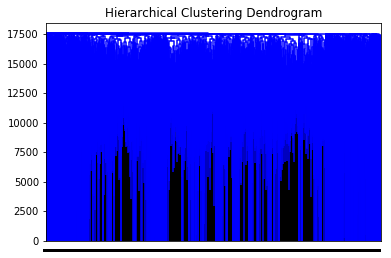

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(DF.values)

X = scaler.fit_transform(DF.values)
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
DF['clust'] = cluster.fit_predict(X)

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    
cluster = cluster.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(cluster, labels=cluster.labels_)
plt.show()

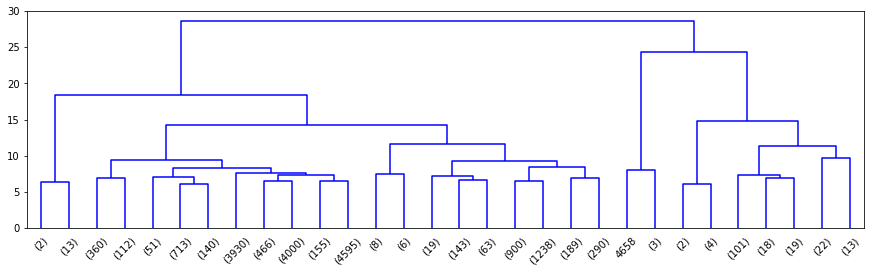

In [21]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

X = scaler.fit_transform(DF.values)

#Hierarchical euclidean
plt.figure(figsize=(15, 4))
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

In [22]:
DF['clust'].value_counts()

2    17378
0      179
3       15
1        4
Name: clust, dtype: int64

In [23]:
DF4 = DF[DF['clust']==2]
#print(DF4)
c41 = 0
c40 = 0

for i in DF4["crash"]:

    if i == 1:
        c41 += 1 
    else:
        c40 += 1
        
                 
print("c41:", c41, c40, c41/c40)

c41: 2411 14967 0.16108772633126212


In [24]:
DF["crash"].value_counts()

0    15120
1     2456
Name: crash, dtype: int64

In [25]:
Xcrash = scaler.fit_transform(DF[DF['crash']==1].values)
ycrash = DF[DF['crash']==1]

In [26]:

y = DF['crash']
for i in y:
    if i==0:
        i=='No'
    else:
        i=='Yes'


clf1 = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1)

#from sklearn.feature_selection import SelectFromModel
#clf1 = SelectFromModel(clf1)
clf1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [42]:
attributes = [col for col in DF.columns if col != 'crash']
#X = DF[['tot_traj',  'avg_events_per_day_loc2', 'avg_angle_C', 'avg_min_speed_per_day', 'tot_events']].values

In [43]:
scaler = MinMaxScaler

X = scaler.fit_transform(DF[['tot_traj',  'avg_events_per_day_loc2', 'avg_angle_C', 'avg_min_speed_per_day', 'tot_events']].values)

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [29]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=800)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=800,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([9078, 5877,  415,    4, 2202], dtype=int64))

In [31]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 9078, 1: 5877, 2: 415, 3: 4, 4: 2202}

In [38]:
DF["kmeans"] = kmeans.labels_

In [39]:
X = X.traspose()

AttributeError: 'numpy.ndarray' object has no attribute 'traspose'

In [32]:
# Illustration of clustering itself
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(X[1], X[0], c=kmeans.labels_, s=20)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()
X=X.transpose()

ValueError: operands could not be broadcast together with shapes (5,5) (7,) (5,5) 

In [33]:
DFx = DF[['tot_traj',  'avg_events_per_day_loc2', 'avg_angle_C', 'avg_min_speed_per_day', 'tot_events']]

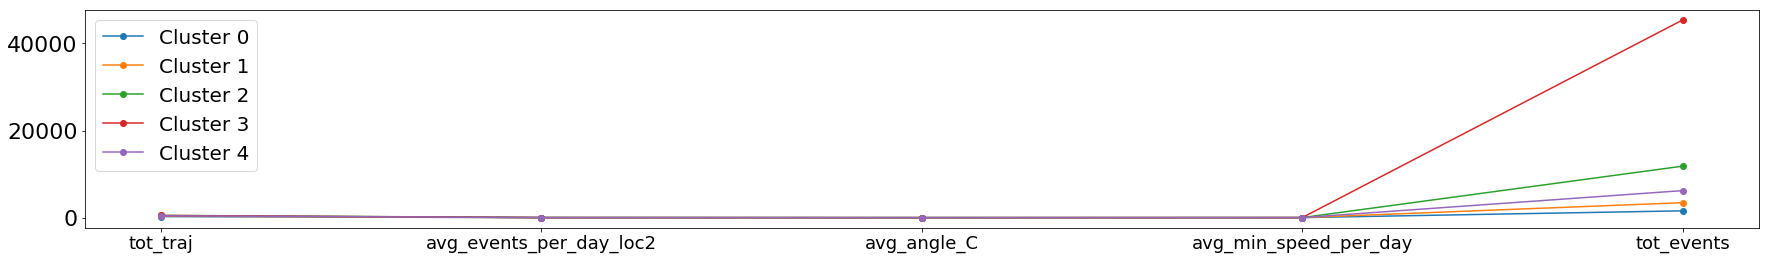

In [34]:
# Illustration of centroids
plt.figure(figsize=(30, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(DFx.columns)), DFx.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [36]:
kmeans.cluster_centers_

array([[ 2.46259927e+02,  4.42540501e+00,  3.60794384e+00,
         1.29780535e+01,  1.56517039e+03],
       [ 3.51720906e+02,  9.43403973e+00,  2.22247518e+00,
         1.27288414e+01,  3.43426580e+03],
       [ 5.20103614e+02,  3.33926370e+01,  4.84149738e+00,
         1.11412067e+01,  1.18277518e+04],
       [ 4.96000000e+02,  1.22100932e+01, -1.92519097e-01,
         7.12431066e+00,  4.53997500e+04],
       [ 4.29680929e+02,  1.70113162e+01,  6.66511027e+00,
         1.22544225e+01,  6.20735366e+03]])

In [37]:
print(scaler.inverse_transform(kmeans.cluster_centers_))

ValueError: operands could not be broadcast together with shapes (5,5) (7,) (5,5) 

In [ ]:
listaImp = []
for col, imp in zip(attributes, clf1.feature_importances_):
    if imp>0:
        print(col, imp)
        listaImp.append(col)
print (len(listaImp))

In [ ]:
dot_data = tree.export_graphviz(clf1, out_file=None,  max_depth=10,
                                feature_names=attributes, 
                                class_names=['Yes' if x == 1 else 'No' for x in clf1.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf1, X, y, cv=8)
scores  

In [ ]:
dt=solving(dt)

# Testing on test sets

In [ ]:
t = pd.read_csv(r'''F:\\Study\\2nd\\BigDataAn\\crash_prediction_dataset\\london_test_4.csv''')
t=solvingMissing(t)
tc = t['crash']
rem = ['crash'] # 'crash'
for i in t: 
    if i not in df0:
        rem.append(i)
t=t.drop(rem, axis=1)

scaler = StandardScaler()
scaler.fit(t.values)
X = scaler.fit_transform(t.values)
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')  
t['clust'] = cluster.fit_predict(X)

y_test=tc
y_pred = clf1.predict(t)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)
valuate(y_pred, y_test)

#with jaccard, cosine e cosine_mov: 43

In [ ]:
'''with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(t.loc[[113]]) 
'''
    

In [ ]:
t = pd.read_csv(r'''F:\\Study\\2nd\\BigDataAn\\crash_prediction_dataset\\tuscany_test_4.csv''')
t=solvingMissing(t)
tc = t['crash']
rem = ['crash'] # 'crash'
for i in t: 
    if i not in df0:
        rem.append(i)
t=t.drop(rem, axis=1)

scaler = StandardScaler()
scaler.fit(t.values)
X = scaler.fit_transform(t.values)
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')  
t['clust'] = cluster.fit_predict(X)

y_test=tc
y_pred = clf1.predict(t)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)
valuate(y_pred, y_test)


#with jaccard, cosine e cosine_mov: 124

In [ ]:
t = pd.read_csv(r'''F:\\Study\\2nd\\BigDataAn\\crash_prediction_dataset\\rome_test_4.csv''')
t=solvingMissing(t)
tc = t['crash']
rem = ['crash'] # 'crash'
for i in t: 
    if i not in df0:
        rem.append(i)
t=t.drop(rem, axis=1)

scaler = StandardScaler()
scaler.fit(t.values)
X = scaler.fit_transform(t.values)
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')  
t['clust'] = cluster.fit_predict(X)

y_test=tc
y_pred = clf1.predict(t)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)
valuate(y_pred, y_test)

#with jaccard, cosine e cosine_mov: 69

In [ ]:
zip(DF.columns[clf1.tree_.feature], clf1.tree_.threshold, clf1.tree_.children_left, clf1.tree_.children_right)

In [ ]:
from inspect import getmembers
print( getmembers( clf1.tree_ ) )